# Top 50 Spotify Tracks of 2020

## Simplified Data Processing and Analysis

Data of Top 50 most streamed tracks on Spotify in 2020 from [Kaggle](https://www.kaggle.com/atillacolak/top-50-spotify-tracks-2020) is used

### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

Dataset consist of **Top 50** most streamed tracks on Spotifty in 2020. Each row corresponds to a single track with variables in columns.

In [2]:
df = pd.read_csv('spotifytoptracks.csv', encoding='utf-8', index_col=0)
df.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


List of variables with description used in this dataset:

* `artist` Name of the artist
* `album` Name of the album that the song is on
* `track_name` Name of the song
* `energy` Higher value means that the songs is more energetic
* `danceability` Higher value means that it is easier to dance to the song
* `key` The primary identifier of songs [0-11]
* `loudness` Higher value means that the song is louder
* `acousticness` This value describes how acoustic a song is
* `speechiness` Speechiness detects the presence of spoken words in a track
* `instrumentalness` Describes whether a track contains no vocals. If the instrumentalness is closer to '1', the song is more likely to have no vocals
* `liveness` Describes the likelihood that the song was recorded with a live audience
* `valence` Describes the positiveness of a song. Higher valence means that the song sounds more positive
* `tempo` beats per minute (BPM)
* `duration_ms` The length of the song in milliseconds
* `genre` Genre of the song


Let us do some checks and tests on the data to see if any data cleaning is needed

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     int64  
 15  genre             50 non-null     object 
dtypes: float64(9), int64(2), object(5)
memory usag

There is no `None` values throughout the dataset. `df.dropna(inplace=True)` command could be run to delete rows with `None` data, neverthless we should check what exactly is missing before deleting.<br />

The data range in columns of `['energy', 'danceability', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence']` should be within range `[0.0 – 1.0]`. Let us check if that is the case in our dataset.

In [4]:
fixed_range_columns = ['energy', 'danceability', 'acousticness', 'speechiness', 
                       'instrumentalness', 'liveness', 'valence']

for feature in fixed_range_columns:
    if df[feature].min() >= 0 and df[feature].max() <= 1:
        print(f'Values of "{feature}" column is within range [{df[feature].min()} – {df[feature].max()}]')
    else:
        print(f'Values of "{feature}" column is out of range [{df[feature].min()} – {df[feature].max()}]')

Values of "energy" column is within range [0.225 – 0.855]
Values of "danceability" column is within range [0.351 – 0.935]
Values of "acousticness" column is within range [0.00146 – 0.934]
Values of "speechiness" column is within range [0.029 – 0.487]
Values of "instrumentalness" column is within range [0.0 – 0.657]
Values of "liveness" column is within range [0.0574 – 0.792]
Values of "valence" column is within range [0.0605 – 0.925]


Values in columns `['tempo', 'duration_ms']` must be `> 0` . Let's check if this is the case

In [5]:
positive_value_columns = ['tempo', 'duration_ms']

for feature in positive_value_columns:
    if all(df[feature]) > 0:
        print(f'All values of feature "{feature}" are positive')
    else:
        print(f'A feature "{feature}" has a negative value of {value}')

All values of feature "tempo" are positive
All values of feature "duration_ms" are positive


Feature `key` is the key the track is in. Integers map to pitches using standard [Pitch Class](https://en.wikipedia.org/wiki/Pitch_class) notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. Checking if value is within `range(-1, 12)`

In [6]:
sorted(df['key'].unique().tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Checking whether there are duplicates in our dataframe:

In [7]:
df.duplicated().any()

False

There is no duplicates! On the other hand we could run `df.drop_duplicates(inplace=True)` to remove duplicated rows.

Pandas documentation says that Categoricals are a pandas data type corresponding to categorical variables in statistics. A categorical variable takes on a limited, and usually fixed, number of possible values. Since feature `track_id` is by no means a `categorical` feature, thus I would like to distinct the data type `object` from `category` and change `dtype` of categorical columns to `category`.

In [8]:
categorical = ['artist', 'album', 'track_name', 'key', 'genre']
for item in categorical:
    df[item] = df[item].astype('category')

With the above finished we are ready to go forward to **Data Processing and Analysis**

### Simplified Data Processing and Analysis

How many **observations** are there in this dataset?

In [9]:
len(df.index)

50

How many **features** this dataset has?

In [10]:
len(df.columns)

16

Which of the features are **Categorical**?

In [11]:
df.select_dtypes(['category']).columns

Index(['artist', 'album', 'track_name', 'key', 'genre'], dtype='object')

Which of the features are **Numerical**?

In [12]:
df.select_dtypes(['float', 'int']).columns

Index(['energy', 'danceability', 'loudness', 'acousticness', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

Are there any **artists that have more than 1 popular track**? If yes, which and how many?

In [13]:
popular_artists = pd.DataFrame({'No. of tracks in TOP50': df.artist.value_counts()})
popular_artists[popular_artists > 1].dropna().astype('int')

,No. of tracks in TOP50
Travis Scott,3
Billie Eilish,3
Dua Lipa,3
Justin Bieber,2
Post Malone,2
Harry Styles,2
Lewis Capaldi,2


Who was the **most popular artist**?

In [14]:
most_pop_artists = pd.DataFrame({'Occurrence in TOP50': df.artist.value_counts()})
most_pop_artists[most_pop_artists['Occurrence in TOP50'] == most_pop_artists['Occurrence in TOP50'].max()]

,Occurrence in TOP50
Travis Scott,3
Billie Eilish,3
Dua Lipa,3


How many **artists in total** have their songs **in** the **top 50**?

In [15]:
df.artist.nunique()

40

Are there any **albums that have more than 1 popular track**? If yes, which and how many?

In [16]:
popular_albums = pd.DataFrame({'No. tracks/album in TOP50': df.album.value_counts()})
popular_albums[popular_albums > 1].dropna().astype('int')

,No. tracks/album in TOP50
Future Nostalgia,3
Fine Line,2
Hollywood's Bleeding,2
Changes,2


How many **albums in total** have their songs **in** the **top 50**?

In [17]:
len(df.album.unique())

45

Which **tracks** have a **danceability score above 0.7**?

In [18]:
danceability_filter_high = df.danceability > 0.7

pd.DataFrame({'Danceability > 0.7': df.track_name[danceability_filter_high]})

,Danceability > 0.7
1,Dance Monkey
2,The Box
3,Roses - Imanbek Remix
4,Don't Start Now
5,ROCKSTAR (feat. Roddy Ricch)
7,death bed (coffee for your head)
8,Falling
10,Tusa
13,Blueberry Faygo
14,Intentions (feat. Quavo)


Which **tracks** have a **danceability score below 0.4**?

In [19]:
danceability_filter_low = df.danceability < 0.4

pd.DataFrame({'Danceability < 0.4': df.track_name[danceability_filter_low]})

,Danceability < 0.4
44,lovely (with Khalid)


Which **tracks** have their **loudness above -5**?

In [20]:
loudness_filter = df.loudness > -5

pd.DataFrame({'Loudness > -5': df.track_name[loudness_filter]})

,Loudness > -5
4,Don't Start Now
6,Watermelon Sugar
10,Tusa
12,Circles
16,Before You Go
17,Say So
21,Adore You
23,Mood (feat. iann dior)
31,Break My Heart
32,Dynamite


Which **tracks** have their **loudness below -8**?

In [21]:
loudness_filter = df.loudness < -8

pd.DataFrame({'Loudness < -8': df.track_name[loudness_filter]})

,Loudness < -8
7,death bed (coffee for your head)
8,Falling
15,Toosie Slide
20,Savage Love (Laxed - Siren Beat)
24,everything i wanted
26,bad guy
36,HIGHEST IN THE ROOM
44,lovely (with Khalid)
47,If the World Was Ending - feat. Julia Michaels


Which **track** is the **longest**?

In [22]:
max_duration = df.duration_ms[df.duration_ms.idxmax()]

print(f'{df.track_name[df.duration_ms.idxmax()]} by {df.artist[df.duration_ms.idxmax()]}. Duration: {max_duration} ms')

SICKO MODE by Travis Scott. Duration: 312820 ms


Which **track** is the **shortest**?

In [23]:
min_duration = df.duration_ms[df.duration_ms.idxmin()]

print(f'{df.track_name[df.duration_ms.idxmin()]} by {df.artist[df.duration_ms.idxmin()]}. Duration: {min_duration} ms')

Mood (feat. iann dior) by 24kGoldn. Duration: 140526 ms


Which **genre** is the **most popular**?

In [24]:
print(f'"{df.genre.value_counts().idxmax()}" genre is the most popular. '
      f'There are {df.genre.value_counts()[0]} tracks of this genre in Top 50')

"Pop" genre is the most popular. There are 14 tracks of this genre in Top 50


Which **genres** have just **one song** on the **Top 50**?

In [25]:
genre_popularity = df.genre.value_counts() == 1
genre_popularity[genre_popularity].index.to_list()

['Alternative/reggaeton/experimental',
 'Chamber pop',
 'Dance-pop/Disco',
 'Disco-pop',
 'Dreampop/Hip-Hop/R&B',
 'Hip-Hop/Trap',
 'Nu-disco',
 'Pop rap',
 'Pop/Soft Rock',
 'R&B/Hip-Hop alternative']

How many **genres in total** are represented in the top 50?

In [26]:
df.genre.nunique()

16

### Exploratory Data Analysis (EDA)

**Features correlation**

With these correlations and a heatmap we may more clearly see a picture of relations between variables. The values below are calculated with **Pearson's method** which may be explained the following:<br />

Correlation coefficient<br />
**close to +1**: Large Positive relationship (when the increase of a value increases the other value)<br />
**close to -1**: Large Negative relationship (when the increase of a value decreases the other value)<br />
**close to 0**: No relationship<br />

In [27]:
df.corr(method='pearson')

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.000000,0.152552,0.791640,-0.682479,0.074267,-0.385515,0.069487,0.393453,0.075191,0.081971
danceability,0.152552,1.000000,0.167147,-0.359135,0.226148,-0.017706,-0.006648,0.479953,0.168956,-0.033763
loudness,0.791640,0.167147,1.000000,-0.498695,-0.021693,-0.553735,-0.069939,0.406772,0.102097,0.064130
acousticness,-0.682479,-0.359135,-0.498695,1.000000,-0.135392,0.352184,-0.128384,-0.243192,-0.241119,-0.010988
speechiness,0.074267,0.226148,-0.021693,-0.135392,1.000000,0.028948,-0.142957,0.053867,0.215504,0.366976
instrumentalness,-0.385515,-0.017706,-0.553735,0.352184,0.028948,1.000000,-0.087034,-0.203283,0.018853,0.184709
liveness,0.069487,-0.006648,-0.069939,-0.128384,-0.142957,-0.087034,1.000000,-0.033366,0.025457,-0.090188
valence,0.393453,0.479953,0.406772,-0.243192,0.053867,-0.203283,-0.033366,1.000000,0.045089,-0.039794
tempo,0.075191,0.168956,0.102097,-0.241119,0.215504,0.018853,0.025457,0.045089,1.000000,0.130328
duration_ms,0.081971,-0.033763,0.064130,-0.010988,0.366976,0.184709,-0.090188,-0.039794,0.130328,1.000000


<AxesSubplot:>

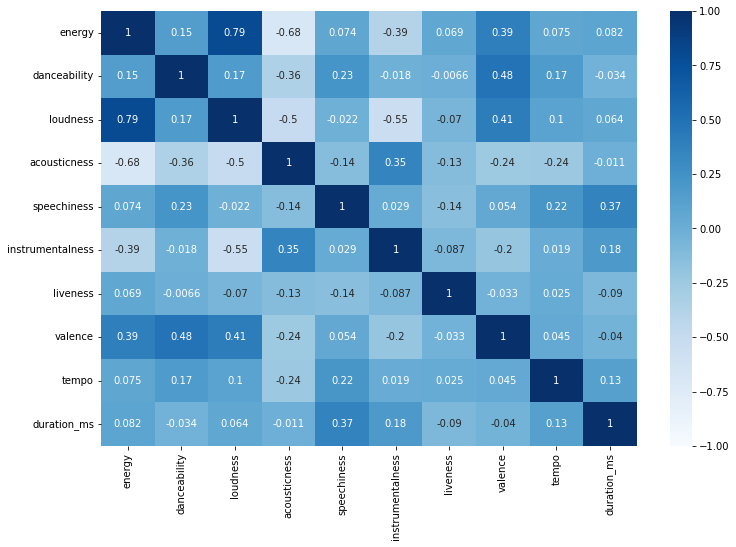

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Blues', vmin=-1, vmax=1)

From the above heatmap we may see a rather strong positive relation `0.79` between `energy` and `loudness`, and vice versa relation `-0.68` between `energy` and `acousticness`. Both relations seems corresponds to the definition of Spotify's `energy` variable: **Energy** represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.<br />

[Text(0.5, 1.0, 'Energy vs Loudness')]

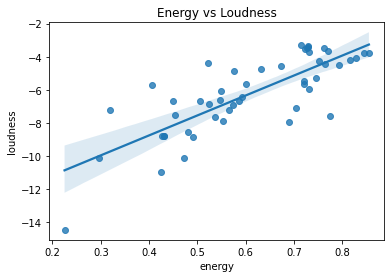

In [29]:
sns.regplot(x='energy', y='loudness', data=df).set(title="Energy vs Loudness")

[Text(0.5, 1.0, 'Energy vs Acousticness')]

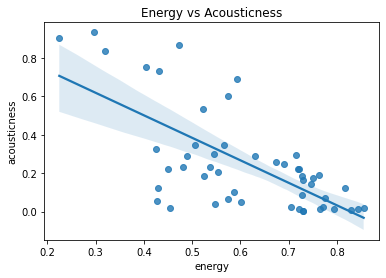

In [30]:
sns.regplot(x='energy', y='acousticness', data=df).set(title="Energy vs Acousticness")

Another worth mentioning positive relation of `0.48` is between `valence` and `danceability`. Again, according to Spotify's definition of `valence`, the higher the `valence` the more positive (e.g. happy, cheerful, euphoric) track is, while tracks with low `valence` sound more negative (e.g. sad, depressed, angry). Thus you may see why `danceability` (how suitable a track is for dancing) is positively related.<br />
<br />

[Text(0.5, 1.0, 'Valence vs Danceability')]

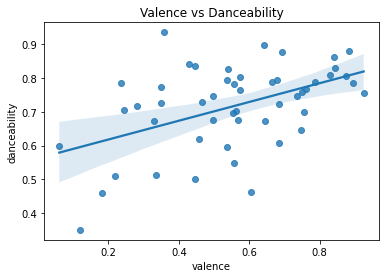

In [31]:
sns.regplot(x='valence', y='danceability', data=df).set(title="Valence vs Danceability")

A typical **no relationship** example could be between `liveness` and `danceability`. A value of `0.0066` is very close to `0`, which proves general understanding that whether track is performed live or not it doesn't affect tracks' `danceability`.

[Text(0.5, 1.0, 'Danceability vs Liveness')]

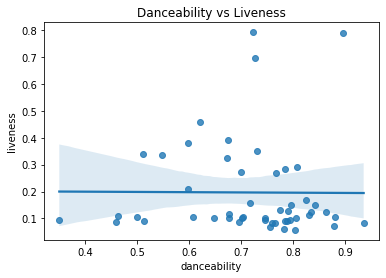

In [32]:
sns.regplot(x='danceability', y='liveness', data=df).set(title="Danceability vs Liveness")

Standard deviation measures how far results spread from the average value, thus the lower the value, the closer object is, the more reliable result

How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres? We see that `Hip-hop/Rap` and `Dance/Electronic` are twice as close than `Alternative/Indie`. Together with a `mean` value we can say which genre is more 'danceable'.

In [33]:
df_pivot = df.pivot_table(values='danceability', index='genre', aggfunc=[np.std, np.mean])
df_pivot.loc[(['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie'])].sort_values(('mean', 'danceability'))

,std,mean
,danceability,danceability
genre,,
Alternative/Indie,0.211107,0.661750
Pop,0.109853,0.677571
Dance/Electronic,0.094744,0.755000
Hip-Hop/Rap,0.085470,0.765538


How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres? The loudness for Pop genre tracks are much more spreaded, while `Alternative/Indie` loudness is more equal.

In [34]:
df_pivot = df.pivot_table(values='loudness', index='genre', aggfunc=[np.std, np.mean])
df_pivot.loc[(['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie'])].sort_values(('mean', 'loudness'))

,std,mean
,loudness,loudness
genre,,
Hip-Hop/Rap,1.891808,-6.917846
Pop,3.014281,-6.460357
Alternative/Indie,0.774502,-5.421000
Dance/Electronic,1.479047,-5.338000


How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres? A clear indication that `Dance/Electronic` genre is realy far from `acousticness`.

In [35]:
df_pivot = df.pivot_table(values='acousticness', index='genre', aggfunc=[np.std, np.mean])
df_pivot.loc[(['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie'])].sort_values(('mean', 'acousticness'))

,std,mean
,acousticness,acousticness
genre,,
Dance/Electronic,0.095828,0.099440
Hip-Hop/Rap,0.186396,0.188741
Pop,0.318142,0.323843
Alternative/Indie,0.204086,0.583500


This dataset unfortunately doesn't include a `year of the track` feature which would allow to see how songs changed over the course of the years.<br />
For more accurate results, especially feature compare by the genre, much more larger dataset is a must.